In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/chingisooinar/KNN-python-implementation/refs/heads/main/Social_Network_Ads.csv")

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [9]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
     

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()

In [12]:
X_train=sc.fit_transform(X_train)

In [15]:
X_test=sc.transform(X_test)


C:\Users\vanshika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
from sklearn.neighbors import KNeighborsClassifier


In [47]:
model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [49]:
y_pred = model.predict(X_test)

# BUILDING A FRICKING OWN KNN

In [41]:
from math import sqrt
from collections import Counter

class KNN():
    def __init__(self, k):
        self.k = k
        print(self.k)

    def fit(self, X_train, y_train):
        self.x_train = X_train
        self.y_train = y_train

    def calculate_euclidean(self, sample1, sample2):
        distance = 0.0
        for i in range(len(sample1)):
            distance += (sample1[i] - sample2[i]) ** 2
        return sqrt(distance)

    def nearest_neighbors(self, test_sample):
        distances = []  # calculate distances from a test sample to every sample in a training set
        for i in range(len(self.x_train)):
            # You may need to check if self.x_train and self.y_train are compatible
            distances.append((self.y_train.iloc[i] if hasattr(self.y_train, 'iloc') else self.y_train[i],
                              self.calculate_euclidean(self.x_train.iloc[i] if hasattr(self.x_train, 'iloc') else self.x_train[i], test_sample)))
        distances.sort(key=lambda x: x[1])  # sort in ascending order, based on a distance value
        neighbors = []
        for i in range(self.k):  # get first k samples
            neighbors.append(distances[i][0])
        return neighbors

    def predict(self, test_set):
        predictions = []
        for test_sample in test_set:
            neighbors = self.nearest_neighbors(test_sample)
            # Use Counter to get the most common label
            prediction = Counter(neighbors).most_common(1)[0][0]
            predictions.append(prediction)
        return predictions


In [42]:
models=KNN(5)
models.fit(X_train,y_train)

5


In [43]:
prediction= models.predict(X_test)

TESTING

In [45]:
from sklearn.metrics import confusion_matrix ,accuracy_score

In [52]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
classifier=model
accuracy_score(y_test,y_pred)

[[68  0]
 [32  0]]


0.68

C:\Users\vanshika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vanshika\AppData\Local\Temp\ipykernel_10232\1769704188.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


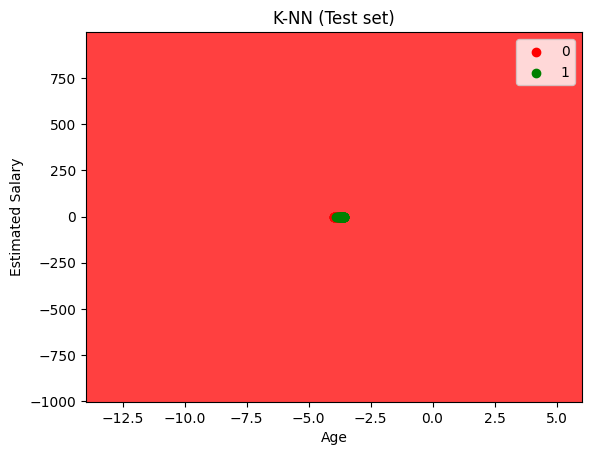

In [53]:

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
     